In [1]:
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

from sklearn.datasets import load_breast_cancer

In [2]:
class MyDummyClassifier(BaseEstimator) :
    
    def fit( self, X, y = None ) : 
        pass ## 아무것도 학습하지 않음
    
    def predict (self, X) :
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] ==1 :
                pred[i] = 0 
            else :
                pred[i] =1
                
            return pred

# a = np.zeros(10)

In [3]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) ## 나이 Null값은 평균값으로 대체
    df['Cabin'].fillna('N',inplace=True) 
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
def transform_features(df):
    df = fillna(df) 
    df = drop_features(df)
    df - format_features(df)
    return df

In [4]:
df = pd.read_csv('./train.csv')
y_df = df['Survived'] ## 종속변수는 생존여부
X_df = df.drop('Survived', axis = 1) ## 그 외 column은 모두 독립변수
X_df = transform_features(X_df)
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size = 0.2, random_state = 0) ## 학습/검증 데이터 분류

In [5]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.6145


In [6]:
class MyFakeClassifier(BaseEstimator) :
    def fir (self, X,y) :
        pass
    
    def predict(self, X) :
        return np.zeros((len(X), 1), dtype = bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y, random_state = 0)

In [7]:
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fir(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    402
1     48
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.893


In [8]:
######## 오차행렬 시작
from sklearn.metrics import confusion_matrix

In [9]:
a = confusion_matrix(y_test, fakepred) ## 오차행렬 그 자체
a

array([[402,   0],
       [ 48,   0]], dtype=int64)

In [10]:
aa = (a[0,0]+a[1,1])/(a[0,0]+a[1,1] + a[1,0] + a[0,1])
aa ## 정확도, 위와 같음

0.8933333333333333

In [11]:
## 정밀도, 재현율 : 정확도보다 더 선호됨
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

In [12]:
def get_clf_eval(y_test, pred) : ## 평가지표 출력할 메서드 생성
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [13]:
data = pd.read_csv('./train.csv')
y_data = data['Survived']
X_data = data.drop('Survived', axis = 1)
X_data = transform_features(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


C:\Users\dayoung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n :', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 : [[0.85222975 0.14777025]
 [0.89314383 0.10685617]
 [0.93313661 0.06686339]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85222975 0.14777025 0.        ]
 [0.89314383 0.10685617 0.        ]
 [0.93313661 0.06686339 0.        ]]


In [15]:
from sklearn.preprocessing import Binarizer
X = [[1,-1,2], [2,0,0], [0,1.1, 1.2]]

# x개의 개별 원소들이 threshold보다 같거나 작으면 0, 크면 1 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [16]:
# Binarizer의 threshold 설정값. 분류 경정 임계값임 = 0.5
custom_threshold = 0.5

#predict_phoba() 반환값의 두 번째 컬럼 즉, Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


In [17]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1) ## [:,1]은 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[86 24]
 [14 55]]
정확도 : 0.7877, 정밀도 : 0.6962, 재현율 : 0.7971


In [18]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds) : ## 여러 임계값을 input하여 평가지표 출력하고 비교하기 위한 메서드 생성
    for custom_threshold in thresholds :
        binarizer =  Binarizer(threshold = custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값 : ', custom_predict)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0

In [19]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력
precisions , recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape : ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출 (나는 166)
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index )
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index],2))

# 15 stpe 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape :  (166,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임계값 :  [0.06 0.1  0.11 0.15 0.19 0.28 0.43 0.57 0.64 0.8  0.91 0.97]
샘플 임계값 별 정밀도 :  [0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
샘플 임계값 별 재현율 :  [1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


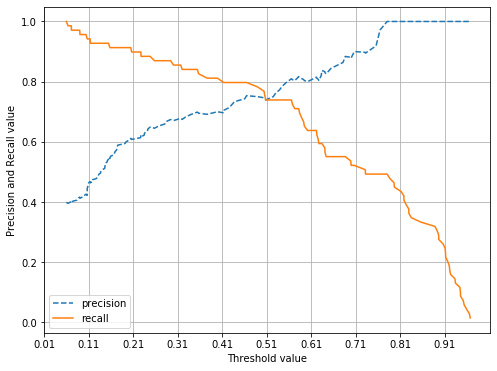

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) : ## 정밀도와 재현율을 그래프로 시각화하기 위한 메서드 생성
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold값으로 Y축은 정밀도, 재현율 값으로  각각 plot 수행. 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--' , label = 'precision') # 점선이 정밀도
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall') # 일자선이 재현율
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [21]:
## F1스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('f1 스코어 : {0:.4f}'.format(f1))

f1 스코어 : 0.7571


In [22]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # f1 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0

In [23]:
 ## ROC곡선, AUC 곡선

In [24]:
from sklearn.metrics import roc_curve

In [25]:
## 레이블 값이 1일떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 @@건이므로 샘플로 10건만 추출하되, 임계값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)

In [26]:
print('샘플 추출을 위한 임계값 배열의 indec 10개 : ',thr_index )
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index],2))

샘플 추출을 위한 임계값 배열의 indec 10개 :  [ 1  6 11 16 21 26 31 36 41 46]
샘플용 10개의 임계값 :  [0.97 0.69 0.6  0.47 0.32 0.25 0.16 0.11 0.11 0.07]


In [27]:
# 5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ',np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR : ',np.round(tprs[thr_index],3))

샘플 임계값별 FPR :  [0.    0.045 0.1   0.164 0.255 0.3   0.473 0.673 0.791 0.918]
샘플 임계값별 TPR :  [0.014 0.551 0.638 0.797 0.841 0.884 0.913 0.928 0.942 0.971]


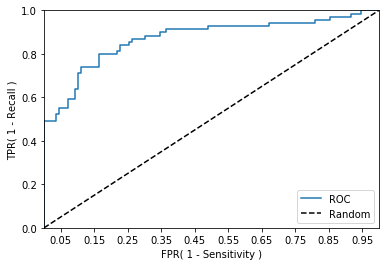

In [28]:
def roc_curve_plot(y_test, pred_proba_c1) :
    #임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( 1 - Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

In [30]:
print(confusion_matrix(y_test, pred))
print('정확도 : ', np.round(accuracy_score(y_test, pred),4))
print('정밀도 : ', np.round(precision_score(y_test, pred),4))
print('재현율 : ', np.round(recall_score(y_test, pred),4))

[[92 18]
 [16 53]]
정확도 :  0.8101
정밀도 :  0.7465
재현율 :  0.7681


In [31]:
def get_clf_eval(y_test, pred, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # Roc -AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC - AUC 프린트 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
            F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [32]:
################
diabets_data = pd.read_csv('diabetes.csv')
t_data = pd.read_csv('./train.csv')
print(diabets_data['Outcome'].value_counts()) ##부정값이 500으로 상당히 많다(당뇨병있다)
diabets_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [33]:
diabets_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
def get_clf_eval(y_test, pred) : ## 평가지표 출력 메서드
    confusion = confusion_matrix(y_test, pred) ## 오차행령
    accuracy = accuracy_score(y_test, pred) ## 정확도
    precision = precision_score(y_test, pred) ## 정밀도
    recall = recall_score(y_test, pred) ## 재현율
    f1 = f1_score(y_test, pred) ## f1스코어 = 2/(1/정밀도 + 1/재현율)
    roc_auc = roc_auc_score(y_test, pred_proba) ## predict(), predict_proba() -> FPR이 변할떄 TPR이 어떻게 변하는지
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
            F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [35]:
# 피처데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값, 칼럼 위치를 -1를 이용해서 추출

X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156) ## 학습/검증 데이터 분류

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred)

오차행렬
[[84 13]
 [24 33]]
정확도 : 0.7597, 정밀도 : 0.7174, 재현율 : 0.5789,            F1 : 0.6408, AUC : 0.8414


C:\Users\dayoung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


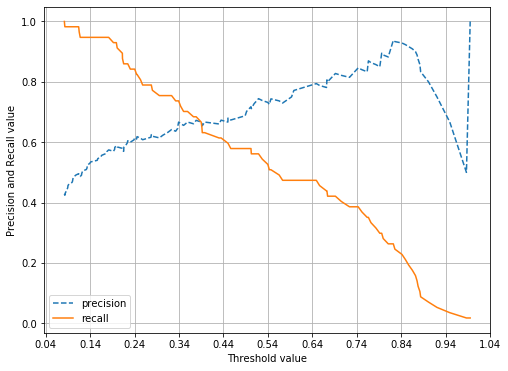

In [36]:
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold값으로 Y축은 정밀도, 재현율 값으로  각각 plot 수행. 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--' , label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1] ## 결과값이 1인 레이블에 대한 pred_proba()
precision_recall_curve_plot(y_test, pred_proba_c1)

In [37]:
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

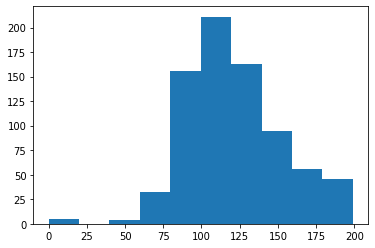

In [38]:
plt.hist(diabets_data['Glucose'], bins = 10)

In [39]:
# 1값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabets_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 1인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features :
    zero_count = diabets_data[diabets_data[feature]==0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))
    
    ## 오버샘플링!!!!!!!!!!!!!!!!!!!!!!

Glucose 0건수는 5, 퍼센트는 0.65%
BloodPressure 0건수는 35, 퍼센트는 4.56%
SkinThickness 0건수는 227, 퍼센트는 29.56%
Insulin 0건수는 374, 퍼센트는 48.70%
BMI 0건수는 11, 퍼센트는 1.43%


In [40]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabets_data[zero_features].mean()
diabets_data[zero_features] = diabets_data[zero_features].replace(0, mean_zero_features)

In [41]:
def get_clf_eval(y_test, pred, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
        F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y) ## 학습/검증 데이터 분류

ir_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

####################### 끝

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,        F1 : 0.6804, AUC : 0.8433


In [42]:
####################### 끝